#Cancer Classification with Neural Network

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.utils import plot_model
%matplotlib inline

**Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# removing the unnamed column
df.drop(columns=['Unnamed: 32','id'], axis = 1, inplace=True)

In [ ]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# checking for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Statistical summary of the data - Descriptive Statistics**

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Distribution of Target Variable**

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Encoding the target column**

In [ ]:
label_encode = LabelEncoder()

labels = label_encode.fit_transform(df['diagnosis'])

df['target'] = labels

df.drop(columns='diagnosis', axis=1, inplace=True)

In [ ]:
# diagnosis column removed
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

Separating the features and target

In [ ]:
X = df.drop(columns='target', axis=1)
Y = df['target']

Splitting the data into training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
def data_summary(X_train,y_train,X_test,y_test):
  '''Summarize current state of dataset'''
  print('Train images shape :',X_train.shape)
  print('Train labels shape :',Y_train.shape)
  print('Test images shape :',X_test.shape)
  print('Test labels shape :',Y_test.shape)

# Check state of dataset
data_summary(X_train,Y_train,X_test,Y_test)

Train images shape : (455, 30)
Train labels shape : (455,)
Test images shape : (114, 30)
Test labels shape : (114,)


Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

**Building the Neural Network**

In [ ]:
# setting up the layers of Neural Network
model=Sequential()

initializer = tf.keras.initializers.HeNormal()
model.add(Dense(20,kernel_initializer = initializer,activation='relu',input_dim=30))
model.add(Dense(10,kernel_initializer = initializer,activation='relu'))
model.add(Dense(5,kernel_initializer = initializer,activation='relu'))
model.add(Dense(2,kernel_initializer = initializer,activation='sigmoid'))

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2437 - accuracy: 0.9853 - val_loss: 0.2384 - val_accuracy: 0.9565
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1898 - accuracy: 0.9902 - val_loss: 0.1771 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1376 - accuracy: 0.9902 - val_loss: 0.1271 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0991 - accuracy: 0.9902 - val_loss: 0.0962 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0761 - accuracy: 0.9902 - val_loss: 0.0780 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0640 - accuracy: 0.9927 - val_loss: 0.0705 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9927 - val_loss: 0.0658 - val_accuracy: 0.9565
Epoch 8/10
13/13 [==

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print()
print('Accuracy :',accuracy)
print()
print('Loss :',loss)

4/4 [==============================] - 0s 8ms/step - loss: 0.1413 - accuracy: 0.9561

Accuracy : 0.9561403393745422

Loss : 0.14127926528453827


Visualizing accuracy and loss

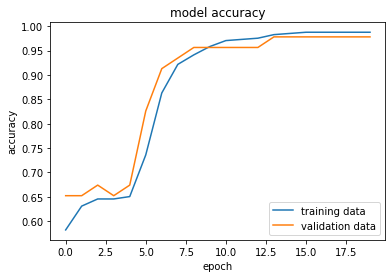

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

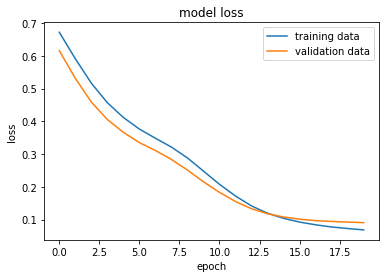

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

###Model Prediction

In [ ]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


**Converting the prediction probability to class labels**

In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


In [ ]:
# Evaluation
print('confusion_matrix :', sklearn.metrics.confusion_matrix(Y_test, Y_pred_labels))
print()
print('classification_report :', sklearn.metrics.classification_report(Y_test,Y_pred_labels))
print()
print('Log Loss :', sklearn.metrics.log_loss(Y_test, Y_pred_labels))

confusion_matrix : [[68  1]
 [ 3 42]]

classification_report :               precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.98      0.93      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Log Loss : 1.2646895926006019


**Building the predictive system**

In [ ]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,
              0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,
              0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Benign')

else:
  print('The tumor is Malignant')

1/1 [==============================] - 0s 25ms/step
[[0.98473036 0.07638687]]
[0]
The tumor is Benign


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
